# Tugas 1 Praktikum Data Science
### Nama : Imam Khusain
### NIM : 123230018
### Kelas : IF-G

## Import Library

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

## 1. Baca dataset Mall Customers ke dalam Python dan tampilkan 5 baris pertama.

In [2]:
data = pd.read_csv("Mall_Customers.csv")
# Tampilkan 5 baris pertama
print(data.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


## 2. Pilih fitur yang relevan untuk clustering, yaitu Annual Income (k$) dan Spending Score (1-100).

In [3]:
from sklearn.preprocessing import StandardScaler

# Select relevant features
features = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Display the first 5 rows of the standardized data
scaled_features[:5]


array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992]])

## 3. Lakukan standarisasi data sebelum diterapkan ke K-Means.

In [4]:
fitur = data[['Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
fitur_scaled = scaler.fit_transform(fitur)

## 4. Tentukan jumlah cluster optimal dengan menggunakan Elbow Method.

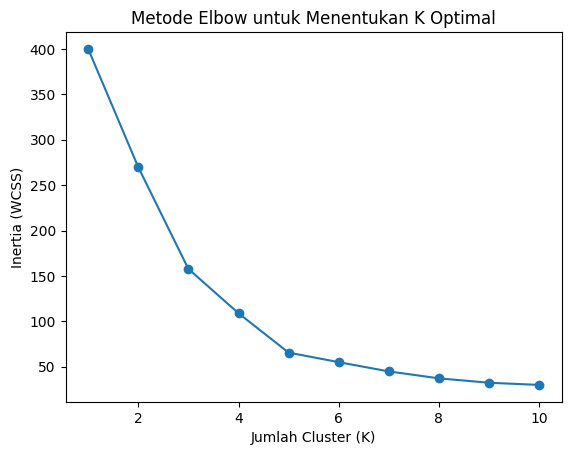

In [5]:
# Menentukan jumlah cluster menggunakan Metode Elbow
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(fitur_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(
    K_range, 
    inertia, 
    marker='o'
)

plt.xlabel('Jumlah Cluster (K)')
plt.ylabel('Inertia (WCSS)')
plt.title('Metode Elbow untuk Menentukan K Optimal')
plt.show()

## 5. Terapkan K-Means Clustering pada dataset dengan jumlah cluster hasil Elbow Method.

In [6]:
# Jalankan K-Means dengan jumlah cluster hasil Elbow (misal 5)
kmeans_model = KMeans(n_clusters=5, random_state=42, n_init=10)
data['Cluster'] = kmeans_model.fit_predict(fitur_scaled)

# Buat kategori pelanggan berdasarkan hasil clustering
kategori_pelanggan = {
    0: 'Segmen Reguler',            # Pendapatan menengah, cukup sering berbelanja
    1: 'Segmen Loyal',              # Pendapatan tinggi, belanja lebih sering dari segmen reguler
    2: 'Segmen Konsumtif',          # Pendapatan relatif rendah, tetapi pengeluaran belanja tinggi
    3: 'Segmen Kaya tapi Hemat',    # Pendapatan tinggi namun frekuensi belanja rendah
    4: 'Segmen Minim Belanja',      # Pendapatan rendah, belanja juga sangat jarang
}

# Tambahkan kolom kategori pelanggan
data['Kategori_Pelanggan'] = data['Cluster'].map(kategori_pelanggan)

# Lihat contoh 20 baris acak
print(data[['Annual Income (k$)', 'Spending Score (1-100)', 'Cluster', 'Kategori_Pelanggan']].sample(20))

     Annual Income (k$)  Spending Score (1-100)  Cluster  \
158                  78                       1        3   
175                  88                      86        1   
51                   42                      60        0   
16                   21                      35        4   
54                   43                      45        0   
154                  78                      16        3   
134                  73                       5        3   
165                  85                      75        1   
55                   43                      41        0   
72                   50                      49        0   
49                   40                      42        0   
101                  62                      48        0   
108                  63                      43        0   
14                   20                      13        4   
23                   25                      73        2   
80                   54                 

## 6. Visualisasikan hasil clustering dalam bentuk scatter plot dengan warna berbeda untuk tiap cluster.

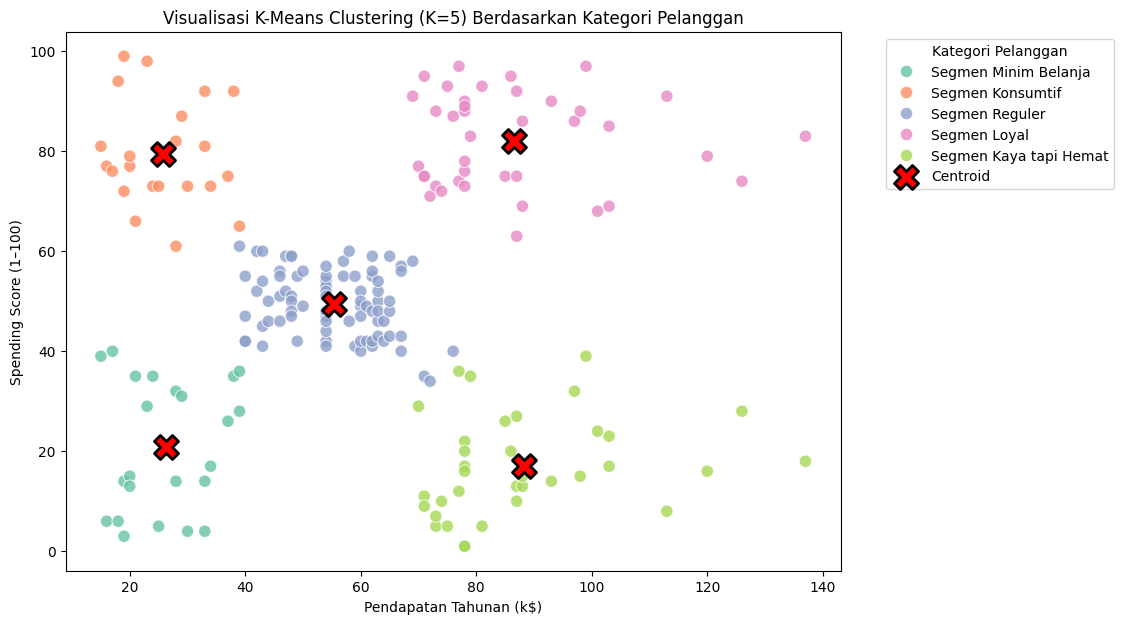

In [7]:
# Visualisasi hasil clustering dengan kategori pelanggan + titik pusat cluster
plt.figure(figsize=(10,7))

# Plot data pelanggan berdasarkan kategori
sns.scatterplot(
    x=data['Annual Income (k$)'],
    y=data['Spending Score (1-100)'],
    hue=data['Kategori_Pelanggan'],
    palette='Set2',
    s=80,
    alpha=0.8
)

# Hitung kembali koordinat centroid dalam skala asli
pusat_scaled = kmeans_model.cluster_centers_
pusat_asli = scaler.inverse_transform(pusat_scaled)

# Plot centroid dengan marker 'X'
plt.scatter(
    pusat_asli[:,0], pusat_asli[:,1],
    c='red',
    marker='X',
    s=300,
    linewidths=2,
    edgecolors='black',
    label='Centroid'
)

plt.xlabel('Pendapatan Tahunan (k$)')
plt.ylabel('Spending Score (1–100)')
plt.title(f'Visualisasi K-Means Clustering (K={kmeans_model.n_clusters}) Berdasarkan Kategori Pelanggan')
plt.legend(title='Kategori Pelanggan', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


## 7. Interpretasikan karakteristik tiap cluster yang terbentuk.
### • Misalnya: cluster dengan pendapatan tinggi dan spending score tinggi → segmen pelanggan premium.
### • Berikan nama segmen untuk tiap cluster.

In [8]:
# Ringkasan statistik tiap cluster
hasil_cluster = data.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].agg(['mean','median'])

# Tambahkan jumlah anggota cluster
jumlah_per_cluster = data['Cluster'].value_counts().sort_index()
hasil_cluster[('Jumlah','Anggota')] = jumlah_per_cluster.values

# Rapikan nama kolom agar lebih mudah dibaca
hasil_cluster.columns = [
    'Pendapatan_Rata2', 'Pendapatan_Median',
    'SkorBelanja_Rata2', 'SkorBelanja_Median',
    'Jumlah_Anggota'
]

In [9]:
# Beri nama segmen berdasarkan karakteristik
segmen = []
for idx, baris in hasil_cluster.iterrows():
    pendapatan = baris['Pendapatan_Rata2']
    spending   = baris['SkorBelanja_Rata2']

    if pendapatan >= 70 and spending >= 70:
        segmen.append('Segmen Premium (Pendapatan Tinggi, Belanja Tinggi)')
    elif pendapatan >= 70 and spending < 50:
        segmen.append('Segmen Bijak (Pendapatan Tinggi, Belanja Rendah)')
    elif pendapatan < 40 and spending >= 60:
        segmen.append('Segmen Potensial (Pendapatan Rendah, Belanja Tinggi)')
    elif pendapatan < 40 and spending < 40:
        segmen.append('Segmen Hemat (Pendapatan Rendah, Belanja Rendah)')
    else:
        segmen.append('Segmen Umum / Lainnya')

hasil_cluster['Nama_Segmen'] = segmen
hasil_cluster

,Pendapatan_Rata2,Pendapatan_Median,SkorBelanja_Rata2,SkorBelanja_Median,Jumlah_Anggota,Nama_Segmen
Cluster,,,,,,
0,55.296296,54.0,49.518519,50.0,81,Segmen Umum / Lainnya
1,86.538462,79.0,82.128205,83.0,39,"Segmen Premium (Pendapatan Tinggi, Belanja Tin..."
2,25.727273,24.5,79.363636,77.0,22,"Segmen Potensial (Pendapatan Rendah, Belanja T..."
3,88.200000,85.0,17.114286,16.0,35,"Segmen Bijak (Pendapatan Tinggi, Belanja Rendah)"
4,26.304348,25.0,20.913043,17.0,23,"Segmen Hemat (Pendapatan Rendah, Belanja Rendah)"


## 8. Buat rekomendasi strategi pemasaran berdasarkan hasil clustering.
### Berdasarkan nama segmen, buat rekomendasi singkat strategi pemasaran untuk tiap segmen.

In [10]:
# Rekomendasi pemasaran per segmen
rekomendasi = {
    'Segmen Premium (Pendapatan Tinggi, Belanja Tinggi)': 
        'Tawarkan program eksklusif seperti membership VIP, promosi khusus, hadiah loyalitas, dan penawaran personal.',
    
    'Segmen Bijak (Pendapatan Tinggi, Belanja Rendah)': 
        'Berikan kampanye khusus seperti bundling produk, diskon terbatas, atau promosi eksklusif agar meningkatkan frekuensi belanja.',
    
    'Segmen Potensial (Pendapatan Rendah, Belanja Tinggi)': 
        'Sediakan paket hemat, promosi harga terjangkau, serta program referral untuk menjaga loyalitas.',
    
    'Segmen Hemat (Pendapatan Rendah, Belanja Rendah)': 
        'Fokus pada promosi musiman, diskon dasar, dan peningkatan kesadaran merek dengan biaya efisien.',
    
    'Segmen Umum / Lainnya': 
        'Gunakan email personalisasi, kampanye musiman, serta strategi cross-selling atau up-selling.'
}

# Tambahkan rekomendasi ke Hasil Cluster
hasil_cluster['Rekomendasi'] = hasil_cluster['Nama_Segmen'].map(rekomendasi)
hasil_cluster

,Pendapatan_Rata2,Pendapatan_Median,SkorBelanja_Rata2,SkorBelanja_Median,Jumlah_Anggota,Nama_Segmen,Rekomendasi
Cluster,,,,,,,
0,55.296296,54.0,49.518519,50.0,81,Segmen Umum / Lainnya,"Gunakan email personalisasi, kampanye musiman,..."
1,86.538462,79.0,82.128205,83.0,39,"Segmen Premium (Pendapatan Tinggi, Belanja Tin...",Tawarkan program eksklusif seperti membership ...
2,25.727273,24.5,79.363636,77.0,22,"Segmen Potensial (Pendapatan Rendah, Belanja T...","Sediakan paket hemat, promosi harga terjangkau..."
3,88.200000,85.0,17.114286,16.0,35,"Segmen Bijak (Pendapatan Tinggi, Belanja Rendah)",Berikan kampanye khusus seperti bundling produ...
4,26.304348,25.0,20.913043,17.0,23,"Segmen Hemat (Pendapatan Rendah, Belanja Rendah)","Fokus pada promosi musiman, diskon dasar, dan ..."
